# 🏋️‍♂️ Model Training

This notebook trains machine learning models to predict employee job satisfaction. We use the cleaned dataset, select relevant features, and evaluate model performance before saving the best model for future predictions.

In [1]:
# 📥 Load Cleaned Data and Split

import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('../../data/processed/employee_data_cleaned.csv')

# Drop identifier
df_model = df.drop(columns=['EmpNumber'])

# Define target and features
target = 'EmpJobSatisfaction'
X = df_model.drop(columns=[target])
y = df_model[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 🎯 Train Baseline Model

We train a Random Forest classifier as a baseline model to predict job satisfaction. This model balances performance and interpretability.

In [2]:
# 🎯 Train Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

           1       0.33      0.50      0.40         4
           2       0.00      0.00      0.00         2
           3       0.25      0.33      0.29         3
           4       0.43      0.33      0.38         9

    accuracy                           0.33        18
   macro avg       0.25      0.29      0.27        18
weighted avg       0.33      0.33      0.32        18



### 🔄 2. Binary Target: Low Satisfaction

We simplify the task by predicting whether an employee has low job satisfaction (levels 1 or 2). This binary classification improves model performance and aligns with retention risk analysis.

In [4]:
# 🔄 Create Binary Target and Redefine Features

# Create binary target
df['LowSatisfaction'] = (df['EmpJobSatisfaction'] <= 2).astype(int)

# Define new target and drop unused columns
target = 'LowSatisfaction'
X = df.drop(columns=['EmpNumber', 'EmpJobSatisfaction', target])
y = df[target]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 🧠 3. Train Random Forest Classifier

We train a Random Forest model to predict low satisfaction. This model balances performance and interpretability.

In [5]:
# 🧠 Train and Evaluate Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.75      0.43      0.55         7

    accuracy                           0.72        18
   macro avg       0.73      0.67      0.67        18
weighted avg       0.73      0.72      0.70        18

Confusion Matrix:
 [[10  1]
 [ 4  3]]


### 💾 4. Save Trained Model

We save the trained binary classifier to the `models/` directory for use in prediction.

In [7]:
# 💾 Save Model

import joblib
joblib.dump(rf, '../../src/models/rf_model.pkl')
print("✅ Model saved to models/rf_model.pkl")

✅ Model saved to models/rf_model.pkl


### 📊 5. Feature Importance

We analyze which features contribute most to predicting low job satisfaction. This helps HR teams focus on the most influential factors.

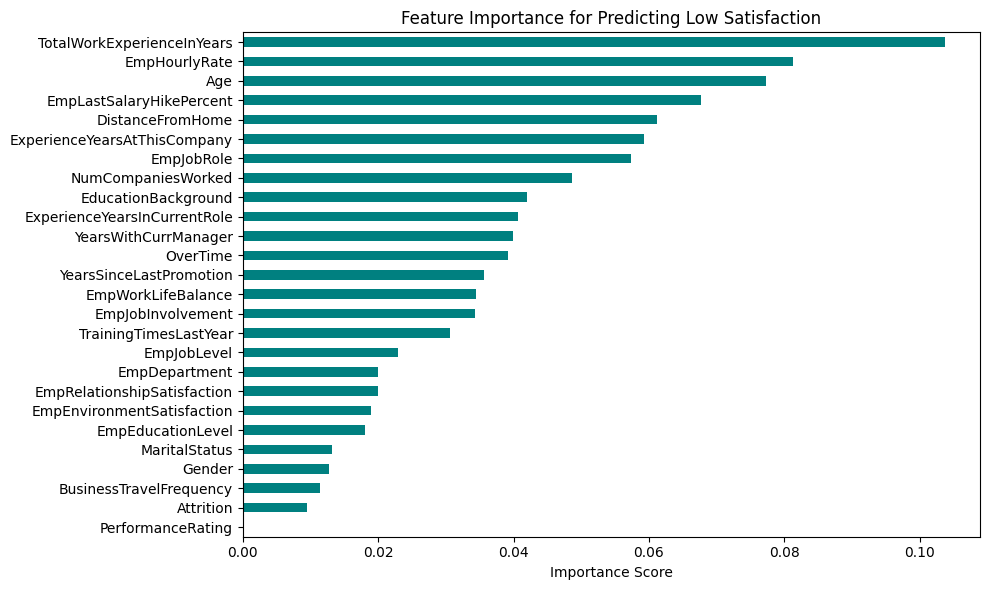

In [8]:
# 📊 Plot Feature Importance

import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10,6))
features.plot(kind='barh', color='teal')
plt.title('Feature Importance for Predicting Low Satisfaction')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()